# Student Grade Prediction Model

## Authors:
- Samuel Nicklaus
- Jakob Kindle
- Lane Swartzendruber
- Alejandro Mirafuentes

# Introduction

In this project, our team focuses on predicting a student's academic performance based on various personal, academic, and social factors using **classification**. We aim to classify students into different grade categories based on inputs such as age, sex, high school type, participation in extracurricular activities, and more. Note that we originally attempted to categorize by every grade, but for a number of reasons this made the accuracy low (Quality of Data, Number of data entries, etc). If you want to run the code with different groupings you can edit the 'grade_mapping' variable in the Data Description code cell.

*Data Source*: [Here](https://www.kaggle.com/datasets/jacksondivakarr/student-classification-dataset?select=student.csv)

*Data Source Description (Via Kaggle):*

This dataset encompasses various aspects related to student performance. Each entry is uniquely identified by an 'Id'. The dataset includes demographic information such as 'Student_Age' and 'Sex'. 'High_School_Type' categorizes the type of high school attended, while 'Scholarship' indicates whether the student has a scholarship. Details about 'Additional_Work' and involvement in 'Sports_activity' provide insights into extracurricular commitments.

'Transportation' outlines the mode of commuting for each student. Academic aspects are captured through 'Weekly_Study_Hours', 'Attendance', and evaluations of 'Reading', 'Notes', and 'Listening_in_Class'. The culmination of these factors is reflected in the 'Grade' column, providing a comprehensive overview of student performance. This dataset serves as a valuable resource for exploring the multifaceted dynamics influencing academic outcomes.


In [123]:
# imports
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
import matplotlib as mpl
import pandas as pd
import seaborn as sns
from sklearn import (datasets, neighbors,
                     naive_bayes,
                     model_selection as skms,
                     linear_model, dummy,
                     metrics,
                     pipeline,
                     preprocessing as skpre)
import ipywidgets as widgets
from ipywidgets import interact
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder,LabelEncoder,OrdinalEncoder
from sklearn.compose import ColumnTransformer

# Data Description

- Student_Age: The age of the student.


- Sex: The gender of the student (e.g., Male, Female).


- High_School_Type: The type of high school the student attended (e.g., State, Private, Other).


- Scholarship: Information on whether the student received a scholarship (e.g., percentages indicating the scholarship amount).


- Additional_Work: Indicates whether the student has additional work or responsibilities outside of school (Yes/No).


- Sports_activity: Indicates whether the student participates in sports activities (Yes/No).


- Transportation: The mode of transportation used by the student to get to school (e.g., Bus, Private).


- Weekly_Study_Hours: The number of hours the student spends studying each week.


- Attendance: The regularity of the student's attendance (e.g., Always, Never).


- Reading: Indicates whether the student engages in reading activities outside of the required curriculum (Yes/No).


- Notes: Indicates whether the student takes notes during classes or while studying (Yes/No).


- Listening_in_Class: Indicates whether the student actively listens in class (Yes/No).


- Project_work: Indicates whether the student participates in project work (Yes/No).


- Grade: The grade the student received, which could be in a variety of formats (e.g., AA, BB, etc).

In [124]:
# Read in data, drop unneeded columns
df = pd.read_csv('student.csv')
df.drop(['Unnamed: 0', 'Id'], axis=1, inplace=True)

# Use one-hot encoding for categorical variables
categorical_vars = ['High_School_Type', 'Scholarship']

# Assign numerical values and encode categorical variables
df['Additional_Work'] = df['Additional_Work'].map({'Yes': 0, 'No' : 1})
df['Sports_activity'] = df['Sports_activity'].map({'Yes': 1, 'No' : 0})
df['Listening_in_Class'] = df['Listening_in_Class'].map({'Yes': 1, 'No' : 0})
df['Project_work'] = df['Project_work'].map({'Yes': 1, 'No' : 0})
df['Notes'] = df['Notes'].map({'Yes': 1, 'No' : 0})
df['Reading'] = df['Reading'].map({'Yes': 1, 'No' : 0})
df['Sex'] = df['Sex'].map({'Male': 1, 'Female' : 0})
df['Transportation'] = df['Transportation'].map({'Private': 1, 'Bus' : 0})
df['Attendance'] = df['Attendance'].map({'Always': 3, 'Sometimes' : 2, 'Never' : 1})

one_hot_encoder = skpre.OneHotEncoder(sparse_output=False)
encoded_vars = one_hot_encoder.fit_transform(df[categorical_vars])
encoded_vars_df = pd.DataFrame(encoded_vars, columns=one_hot_encoder.get_feature_names_out(categorical_vars))

# Drop original categorical variables and some columns that are not needed
df.drop(categorical_vars, axis=1, inplace=True)
grade_mapping = {
    'AA': 4, 'BA': 3, 'BB': 3, 'BC': 3, 'CC': 2, 'CB': 2, 'DC': 1, 'DD': 1, 'Fail': 1
}
df['Grade'] = df['Grade'].map(grade_mapping)
encoded_vars_df.drop(['Scholarship_nan'], axis=1, inplace=True)
df_encoded = pd.concat([df, encoded_vars_df], axis=1)
df_encoded.dropna(inplace=True)

# Split data
X = df_encoded.drop('Grade', axis=1)  # Features
y = df_encoded['Grade']  # Target variable

X_temp, X_test, y_temp, y_test = skms.train_test_split(X, y, test_size=0.20, random_state=42)

X_train, X_validation, y_train, y_validation = skms.train_test_split(X_temp, y_temp, test_size=0.20, random_state=42)

# 15% validation, 20% test, 65% training
print(len(X_train))
print(len(X_validation))
print(len(X_test))
df_encoded.head()

89
23
29


,Student_Age,Sex,Additional_Work,Sports_activity,Transportation,Weekly_Study_Hours,Attendance,Reading,Notes,Listening_in_Class,Project_work,Grade,High_School_Type_Other,High_School_Type_Private,High_School_Type_State,Scholarship_100%,Scholarship_25%,Scholarship_50%,Scholarship_75%
0,21,1,0,0,1,0,3.0,1,1.0,0.0,0,4,1.0,0.0,0.0,0.0,0.0,1.0,0.0
1,20,1,0,0,1,0,3.0,1,0.0,1.0,1,4,1.0,0.0,0.0,0.0,0.0,1.0,0.0
2,21,1,1,0,1,2,1.0,0,0.0,0.0,1,4,0.0,0.0,1.0,0.0,0.0,1.0,0.0
3,18,0,0,0,0,2,3.0,0,1.0,0.0,0,4,0.0,1.0,0.0,0.0,0.0,1.0,0.0
4,22,1,1,0,0,12,3.0,1,0.0,1.0,1,4,0.0,1.0,0.0,0.0,0.0,1.0,0.0


# Data Visualization

Just some plots to validate our data cleaning 

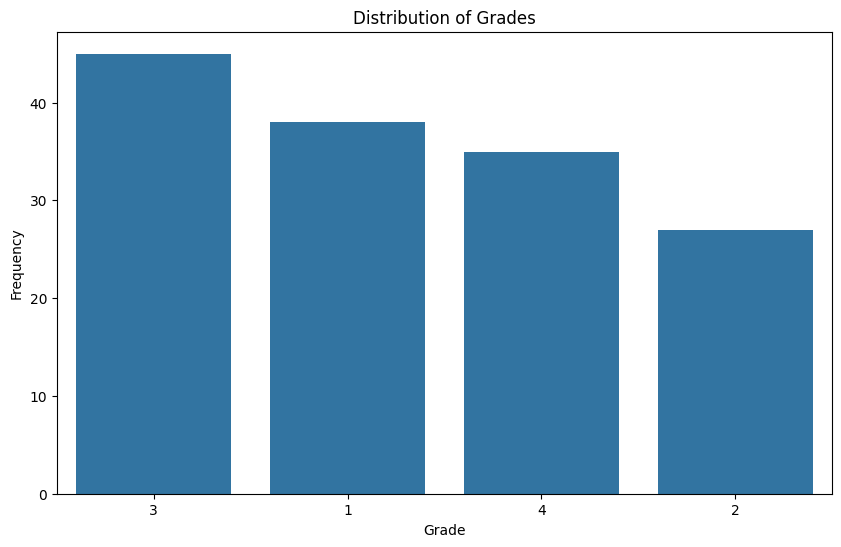

<Axes: xlabel='Student_Age', ylabel='count'>

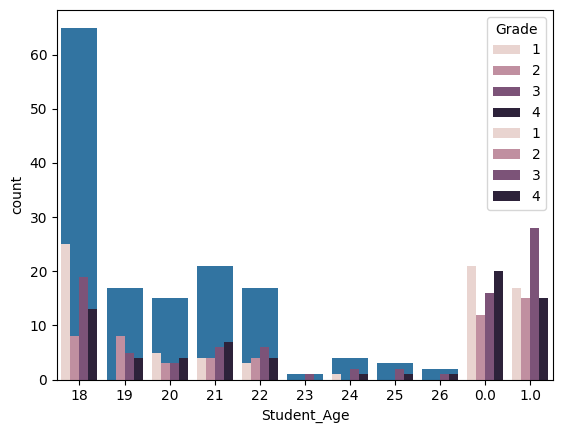

In [125]:
plt.figure(figsize=(10, 6))
sns.countplot(data=df, x='Grade', order=df['Grade'].value_counts().index)
plt.title('Distribution of Grades')
plt.xlabel('Grade')
plt.ylabel('Frequency')
plt.show()

sns.countplot(x='Student_Age',data=df)
sns.countplot(x='Student_Age',data=df,hue='Grade')
sns.countplot(x='Listening_in_Class',data=df,hue='Grade')

# Training/validation

Training and validation was preformed using the following code below:

We have a comprehensive list of models to be tested, ranging frorm KNN to Naive Bayes to Random Forest, all with different parameters.
In the main part of our code we loop through every model and train the model againsts the training set with every possible combinations of features. Since all of our features are hot one encoded, it would've taken too long to go through every possible combination so we grouped them back together (We will probably learn a better way to feature select in a future lecture).

Note that the cell below takes like an hour to run

The output only prints out a accuracy score if its higher than the previous best:

Example Output:

Trying model: RandomForest-n=10

0.2608695652173913

0.34782608695652173

0.391304347826087

0.43478260869565216

0.4782608695652174

0.5217391304347826

0.5652173913043478

0.6086956521739131

Trying model: RandomForest-n=10, Max Depth=10

Trying model: RandomForest-n=20

Trying model: RandomForest-n=20, Max Depth=10

Trying model: RandomForest-n=100

Best Model: RandomForest-n=10

Best Score: 0.6086956521739131

Best Features: ['High_School_Type_Private', 'High_School_Type_State', 'High_School_Type_Other', 'Additional_Work', 'Reading', 'Notes', 'Student_Age']

In [127]:
from itertools import combinations
from sklearn.ensemble import RandomForestClassifier
best_score = 0
best_model = None
best_features = None
models = [
    # Uncomment these if you want to run them
    # {"name": "KNN-n=1", "model": neighbors.KNeighborsClassifier(n_neighbors=1)},
    # {"name": "KNN-n=2", "model": neighbors.KNeighborsClassifier(n_neighbors=2)},
    # {"name": "KNN-n=3", "model": neighbors.KNeighborsClassifier(n_neighbors=3)},
    # {"name": "KNN-n=4", "model": neighbors.KNeighborsClassifier(n_neighbors=4)},
    # {"name": "KNN-n=9", "model": neighbors.KNeighborsClassifier(n_neighbors=9)},
    # {"name": "GaussianNB", "model": naive_bayes.GaussianNB()},
    {"name": f"RandomForest-n=10", "model": RandomForestClassifier(n_estimators=10, max_depth=5)},
    {"name": f"RandomForest-n=10, Max Depth=10", "model": RandomForestClassifier(n_estimators=10, max_depth=10)},
    {"name": f"RandomForest-n=20", "model": RandomForestClassifier(n_estimators=20, max_depth=5)},
    {"name": f"RandomForest-n=20, Max Depth=10", "model": RandomForestClassifier(n_estimators=20, max_depth=10)},
    {"name": f"RandomForest-n=100", "model": RandomForestClassifier(n_estimators=100, max_depth=5)},
]

feature_groups = {
    'Weekly_Study_Hours': ['Weekly_Study_Hours'],
    'Listening_in_Class': ['Listening_in_Class'],
    'Sports_activity': ['Sports_activity'],
    'Sex': ['Sex'],
    'High_School_Type': ['High_School_Type_Private', 'High_School_Type_State', 'High_School_Type_Other'],
    'Scholarship': ['Scholarship_25%', 'Scholarship_50%', 'Scholarship_75%', 'Scholarship_100%'],
    'Additional_Work': ['Additional_Work'],
    'Transportation': ['Transportation'],
    'Reading': ['Reading'],
    'Notes': ['Notes'],
    'Project_work': ['Project_work'],
    'Student_Age': ['Student_Age'],
    'Weekly_Study_Hours': ['Weekly_Study_Hours'],
    'Attendance': ['Attendance']
}

# Iterating through each model
for model in models:
    # Trying every combination of feature groups
    print(f"Trying model: {model['name']}")
    for L in range(1, len(feature_groups) + 1):
        for subset in combinations(feature_groups.keys(), L):
            selected_features = [feature for group in subset for feature in feature_groups[group]]
            # Selecting the subset of features
            X_train_sub = X_train[selected_features]
            X_validation_sub = X_validation[selected_features]
                
            # Fitting the model
            fit = model['model'].fit(X_train_sub, y_train)
            predictions = fit.predict(X_validation_sub)
            score = metrics.accuracy_score(y_validation, predictions)
            # Updating the best score and best model if this model is better
            if score > best_score:
                print(score)
                best_score = score
                best_model = model['name']
                best_features = selected_features

print(f"Best Model: {best_model}\nBest Score: {best_score}\nBest Features: {best_features}")

Trying model: RandomForest-n=10
0.2608695652173913
0.34782608695652173
0.391304347826087
0.43478260869565216
0.4782608695652174
0.5217391304347826
0.5652173913043478
0.6086956521739131
Trying model: RandomForest-n=10, Max Depth=10
Trying model: RandomForest-n=20
Trying model: RandomForest-n=20, Max Depth=10
Trying model: RandomForest-n=100
Best Model: RandomForest-n=10
Best Score: 0.6086956521739131
Best Features: ['High_School_Type_Private', 'High_School_Type_State', 'High_School_Type_Other', 'Additional_Work', 'Reading', 'Notes', 'Student_Age']


# Results on Test Set

Took the final model from above and ran it againsts our test set

In [128]:
X_test_sub = X_test[selected_features]
                
predictions = fit.predict(X_test_sub)
score = metrics.accuracy_score(y_test, predictions)
print(f"Test Score: {score}")

Test Score: 0.3793103448275862


# Discussion/Conclusion

Overall, while we are dissapointed in our accuracy result, we think that it is a product of the dataset we chose. Picking a dataset which only has a few numerical values + a lot of true/false answers just doesn't work well with classification without proper weighting of those variables. While hot-one-encoding a lot of the true/false features guarentees fairness between the features, it did impact accuracy. If we had more time I think we would try to find correleation between variables and weight them by hand first before running our model selection.

As for the experience of completing the project, we think it was laid out well and was a good way for us to get hands on experience with going through the whole process of making a ML model. We do think that in the future it would be good to have to get a dataset checked off by either a TA or a Professor before proceeding. 

# Disclosures

The use of ChatGPT was used to help make guided decisions, such as methods to clean the dataset, as well as methods to test many different feature combinations againsts one model (this was before we learned how to do it in lecture).

